In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

### Exploratory Data Analysis (EDA)

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Data Cleaning

In [8]:
# Dropping Name,Cabin and PassengerID
df.drop(["PassengerId","Cabin","Name"],axis = 1, inplace = True)

In [9]:
#Filling the Age column by its mean
df.fillna(df.Age.mean(),inplace=True)

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Evaluating the target columns
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Data Visualisation

<AxesSubplot:xlabel='Age', ylabel='Survived'>

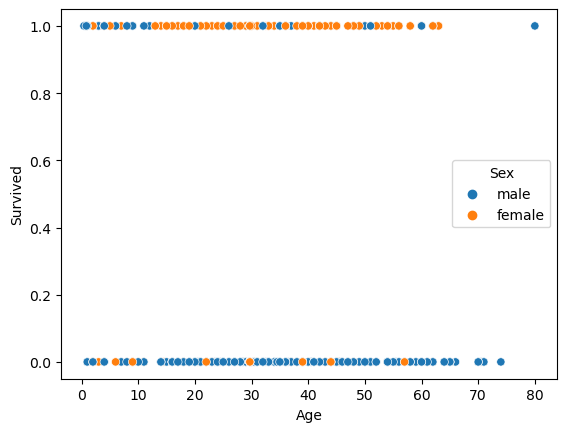

In [12]:
sns.scatterplot(x="Age",y="Survived",data=df, hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

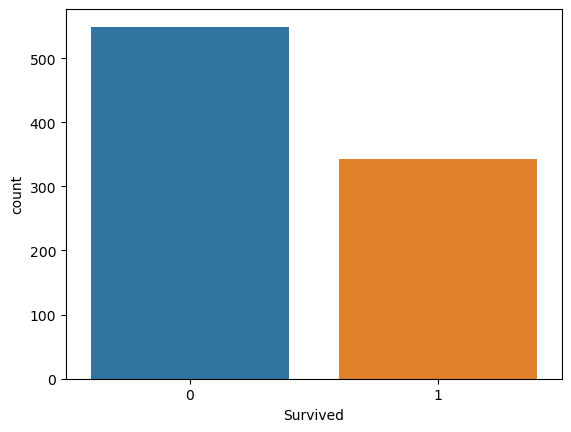

In [13]:
sns.countplot(x="Survived", data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

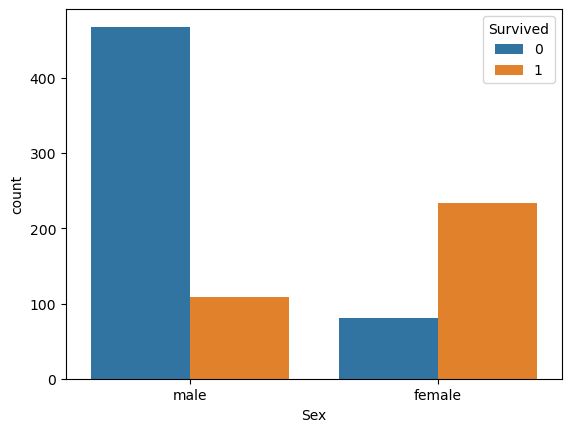

In [14]:
sns.countplot(x="Sex", data=df,hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

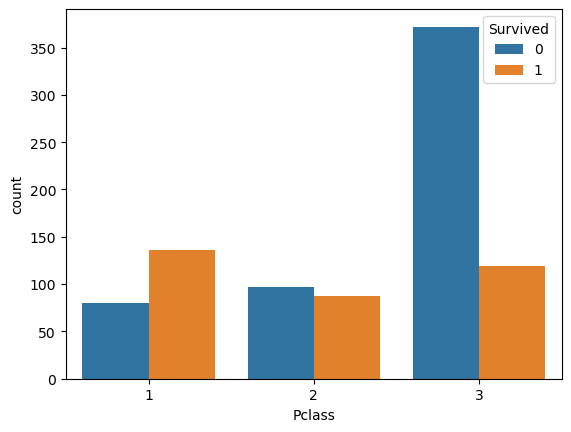

In [15]:
sns.countplot(x="Pclass",data=df,hue="Survived")

In [16]:
# Checking each columns
for column in df.columns:
    print(df[column].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
S                    644
C                    168
Q         

In [17]:
# While we analyse the above data, we can drop some columns
df.drop(["SibSp","Parch","Ticket","Embarked"],axis=1,inplace=True)

In [18]:
df.shape

(891, 5)

In [19]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [20]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [21]:
# To change the categorical column(Sex) to numerical column, here we are using One-hot encoding
dummies = pd.get_dummies(df.Sex,drop_first=True).astype("int")

In [22]:
# Now we have to drop the Sex column and concatenate new column with our df
df.drop("Sex",axis=1,inplace= True)

In [23]:
df1 = pd.concat([df,dummies],axis = 1)

In [24]:
df1.head(5)

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [25]:
# Now every column is numerical column so start creating the model.
X = df1.drop("Survived",axis=1)
y= df1["Survived"]

In [26]:
X

,Pclass,Age,Fare,male
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [27]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Train ,Test, Split and Scaling

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.transform(X_test)

### Finding the best model by using Hyperparameter Tuning

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
model_parameters = {
    "Logistic_Regression":{
        "model":LogisticRegression(),
        "params":{
            "C":[1,5,10]
        }
    },
    "Random_Forest":{
        "model":RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10]
        }
    },
    "SVM": {
        "model": SVC(gamma="auto"),
        "params":{
            "C":[1,10,20],
            "kernel":["rbf","linear"]
        }
    }
    
}

In [33]:
scores = []

for model_name,mp in model_parameters.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=2,return_train_score=False)
    clf.fit(X,y)
    scores.append({
        "model":model_name,
        "best_score":clf.best_score_,
        "best_params":clf.best_params_
    })

In [34]:
scores

[{'model': 'Logistic_Regression',
  'best_score': 0.7710485211870812,
  'best_params': {'C': 1}},
 {'model': 'Random_Forest',
  'best_score': 0.7777825364034867,
  'best_params': {'n_estimators': 10}},
 {'model': 'SVM',
  'best_score': 0.7867385499067869,
  'best_params': {'C': 10, 'kernel': 'linear'}}]

In [35]:
pd.DataFrame(scores)

,model,best_score,best_params
0,Logistic_Regression,0.771049,{'C': 1}
1,Random_Forest,0.777783,{'n_estimators': 10}
2,SVM,0.786739,"{'C': 10, 'kernel': 'linear'}"


### From this we can choose Random forest as our best fitting model

In [36]:
model = RandomForestClassifier()
model.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [37]:
model.score(scaled_X_test,y_test)

0.8059701492537313

### Model Performance on Classification Tasks

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(),X,y,cv=5)

array([0.76536313, 0.80898876, 0.86516854, 0.79775281, 0.81460674])

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
y_pred = model.predict(scaled_X_test)
cm=confusion_matrix(y_test,y_pred)

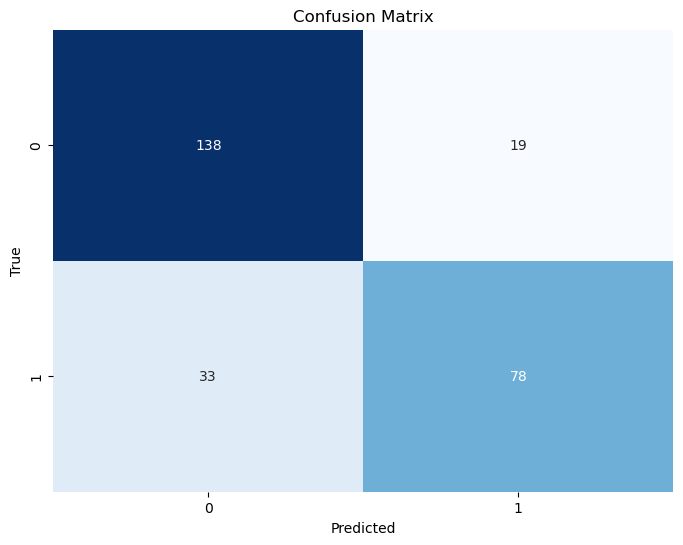

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [44]:
y_pred = model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.8059701492537313